
QUESTION 1 - PARKINSON'S DISEASE DATASET

3122 21 5001 102
SHRAVAN SREERAM

In [ ]:
# Loading the dataset
import numpy as np
import pandas as pd

df = pd.read_csv("/content/parkinsons.data")
print(df.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

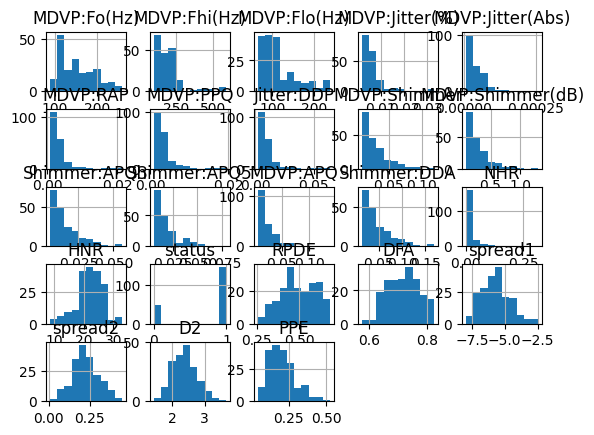

In [ ]:
# Exploratory data analysis
df.hist()
plt.show()

In [ ]:
df.isna().sum()                                            # NO null values

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = df.drop('name',axis=1)             # Droping the name column as it is not required

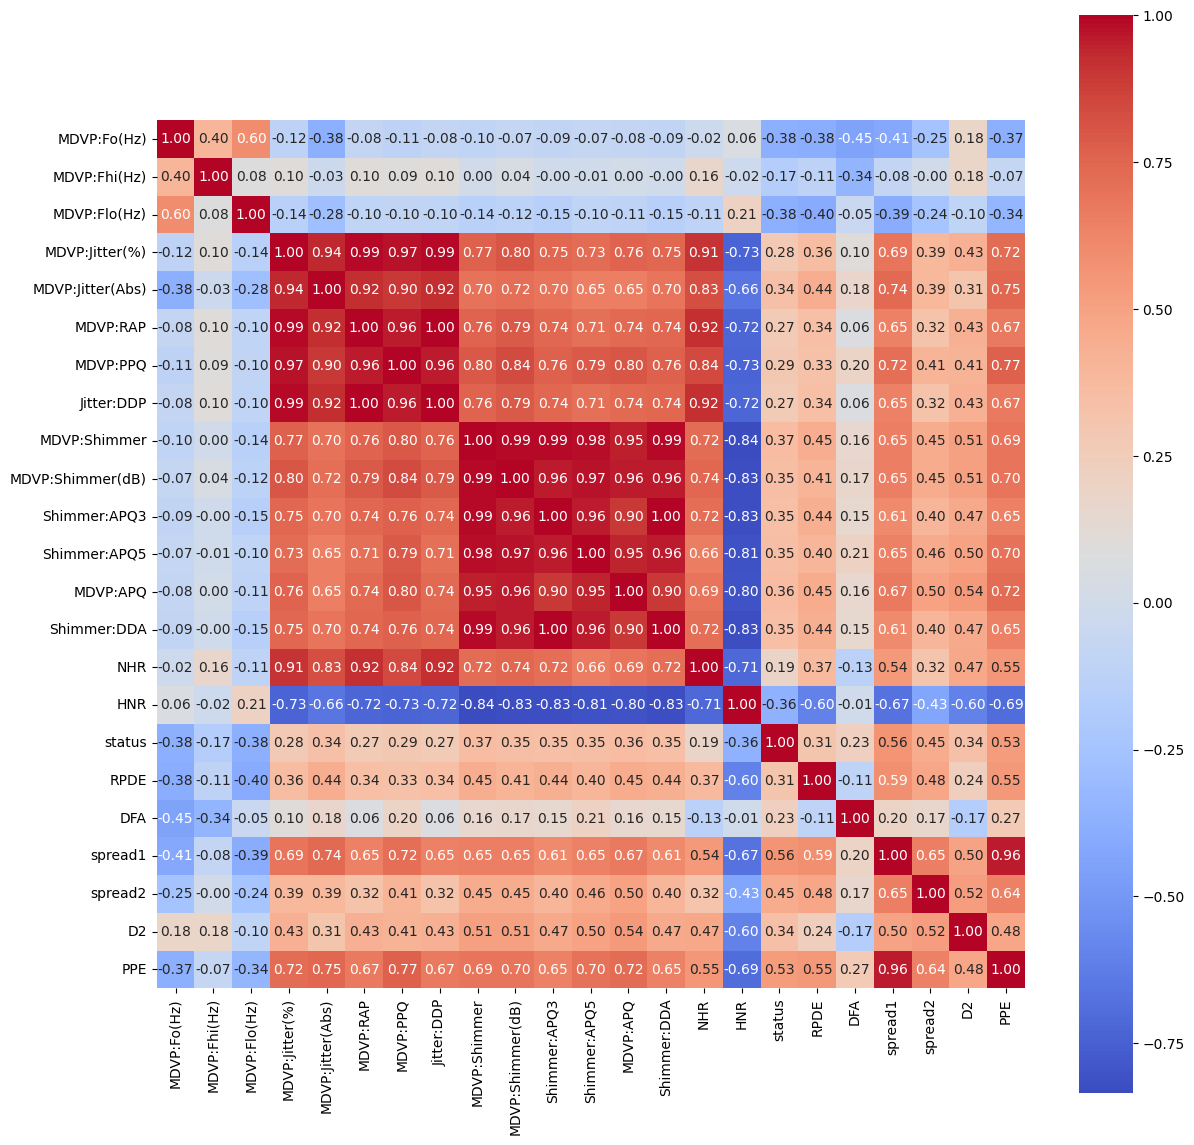

In [ ]:
# Correlation Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr_matrix,annot=True,fmt = ".2f",cmap = "coolwarm",cbar = True,square = True)

plt.show()

In [ ]:
# Feature Engineering- Every column has some correlation with the output row - status, so we dont remove anything

In [ ]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X = df.drop('status',axis=1)
Y = df['status']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
modellr = LinearRegression()
modellr.fit(x_train, y_train)
y_pred = modellr.predict(x_test)
accuracy = modellr.score(x_test, y_test)
print(f"Accuracy (R-squared): {accuracy:.2f}")


Accuracy (R-squared): 0.34


In [ ]:
# Normalization
for column in df.columns:
    df[column] = (df[column] - df[column].mean()) / df[column].std()



#After note : Normalization reduced the accuracy of the linear regression model, hence it is not used. The original df was executed again to replace this

In [ ]:
print(df)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0      -0.827171     -0.435045     -0.949593        0.334054   
1      -0.768992     -0.529611     -0.057572        0.713581   
2      -0.907141     -0.721312     -0.109593        0.882719   
3      -0.907286     -0.647425     -0.113935        0.773398   
4      -0.923281     -0.604689     -0.130272        1.365379   
..           ...           ...           ...             ...   
190     0.482226      0.370232     -0.506960       -0.336307   
191     1.335764      0.611117     -0.616630       -0.119729   
192     0.494306      0.468897     -0.965907        1.522140   
193     1.075992      2.184421     -0.951730        0.243297   
194     1.451082      0.690469     -0.881213       -0.113541   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0            0.747835  0.132621  0.758847    0.131417      0.744070   
1            1.035010  0.452726  1.273531    0.451521      1.677413   
2            1.322

In [ ]:
# Perceptron Learning Algorithm
class Perceptron:
    def __init__(self, num_features, learning_rate=0.01, max_epochs=100):
        self.weights = np.zeros(num_features)
        self.bias = 0
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs

    def predict(self, X):
        return np.where(np.dot(X, self.weights) + self.bias >= 0, 1, 0)

    def train(self, X, y):
        for _ in range(self.max_epochs):
            for xi, yi in zip(X, y):
                prediction = self.predict(xi)
                update = self.learning_rate * (yi - prediction)
                self.weights += update * xi
                self.bias += update
perceptron = Perceptron(num_features=x_train.shape[1])
perceptron.train(x_train.values, y_train.values)

In [ ]:
print(perceptron.weights , perceptron.bias)

[-1.57789000e+00  2.23565000e+00 -3.50265000e+00  1.42917800e-01
  1.14862000e-03  8.10523000e-02  8.30600000e-02  2.43199200e-01
  6.91610300e-01  6.71461000e+00  3.58706100e-01  4.28868700e-01
  5.99919700e-01  1.07609030e+00  7.95990100e-01  2.51572100e+01
  5.16913873e+00  5.32202971e+00  6.08563523e+00  4.11903392e+00
  2.30878752e+01  4.79269287e+00] 6.31999999999991


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = perceptron.predict(x_test.values)
print(y_pred)


[1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1]


In [ ]:
l1 = (list(y_test))
print(len(l1),len(y_pred))

39 39


In [ ]:
accu = 0
for i in range(len(l1)):
  if l1[i] == y_pred[i]:
    accu += 2.564102564
print(accu)                                                  # PLA Accurary is 64.1 %

0


0.6410256410256411


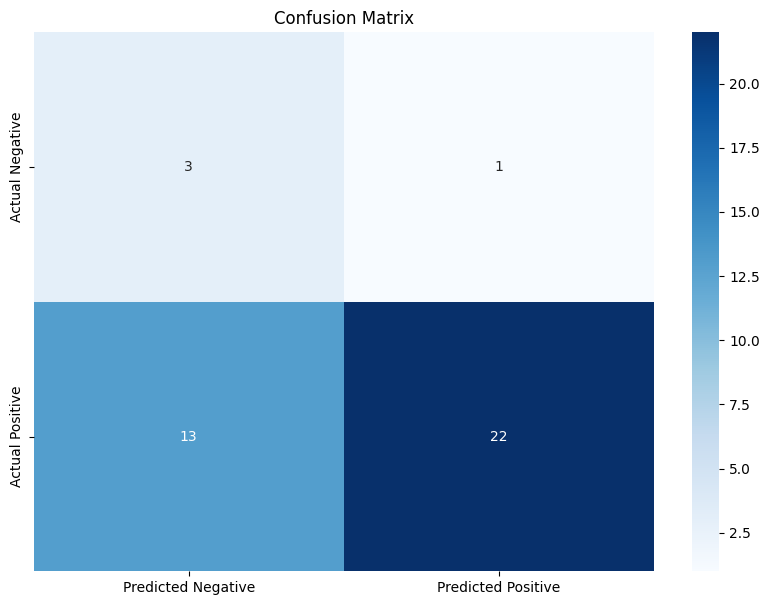

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,l1)
print(accuracy_score(y_pred, l1))
cm_displayer(cm)

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [ ]:
print(y_train.shape, x_train.shape, x_test.shape,y_test.shape)


(156,) (156, 22) (39, 22) (39,)


In [ ]:
 # Multi Layer Perceptron
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

input_dim = x_train.shape[1]
output_dim = 1

model = Sequential([
    Dense(64, input_dim=input_dim, activation='tanh'),
    Dense(128, input_dim=input_dim, activation='tanh'),
    Dense(64, input_dim=input_dim, activation='tanh'),
    Dense(output_dim, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train.values, y_train.values, epochs=15, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(x_test.values, y_test.values)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
    #        MLP Accuracy 74%

Epoch 1/15
4/4 [==============================] - 1s 83ms/step - loss: 0.5890 - accuracy: 0.7581 - val_loss: 0.5788 - val_accuracy: 0.7188
Epoch 2/15
4/4 [==============================] - 0s 23ms/step - loss: 0.5219 - accuracy: 0.7419 - val_loss: 0.5827 - val_accuracy: 0.7188
Epoch 3/15
4/4 [==============================] - 0s 22ms/step - loss: 0.5065 - accuracy: 0.7661 - val_loss: 0.5652 - val_accuracy: 0.7188
Epoch 4/15
4/4 [==============================] - 0s 21ms/step - loss: 0.4832 - accuracy: 0.7823 - val_loss: 0.5238 - val_accuracy: 0.7812
Epoch 5/15
4/4 [==============================] - 0s 16ms/step - loss: 0.4594 - accuracy: 0.8145 - val_loss: 0.5020 - val_accuracy: 0.7812
Epoch 6/15
4/4 [==============================] - 0s 16ms/step - loss: 0.4359 - accuracy: 0.8145 - val_loss: 0.4962 - val_accuracy: 0.7812
Epoch 7/15
4/4 [==============================] - 0s 23ms/step - loss: 0.4218 - accuracy: 0.8306 - val_loss: 0.5110 - val_accuracy: 0.6875
Epoch 8/15
4/4 [===========

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
SVM = SVC(probability=True, kernel = 'linear')
SVM.fit(x_train,y_train)
y_pred_SVM = SVM.predict(x_test)


In [ ]:
training_data_accuracy = accuracy_score(y_test, y_pred_SVM)
print(training_data_accuracy)                                    # SVM model is 89% accurate

0.8974358974358975


0.8974358974358975


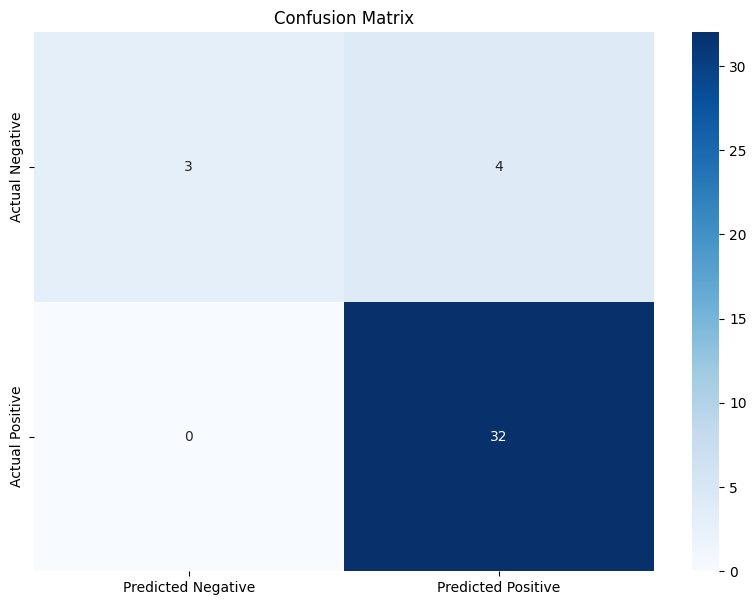

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_SVM)
print(accuracy_score(y_test, y_pred_SVM))
cm_displayer(cm)

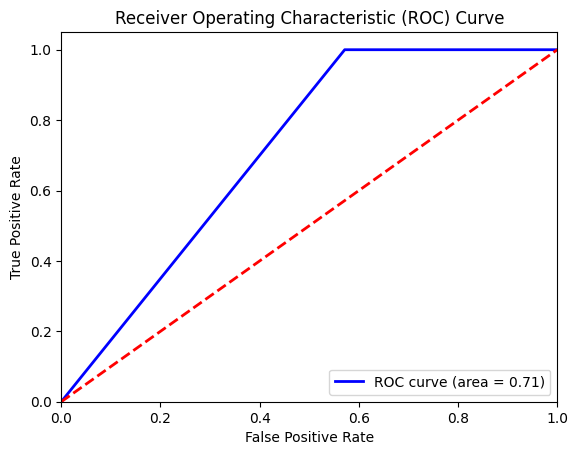

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test.values, y_pred_SVM)  # Calculate AUC score
fpr, tpr, thresholds = roc_curve(y_test.values, y_pred_SVM)  # Compute ROC curve and ROC area

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred_KNN = KNN.predict(x_test)

In [ ]:
training_data_accuracy = accuracy_score(y_test, y_pred_KNN)
print(training_data_accuracy)                                    # KNN model is 82% Accurate

0.8205128205128205


0.8205128205128205


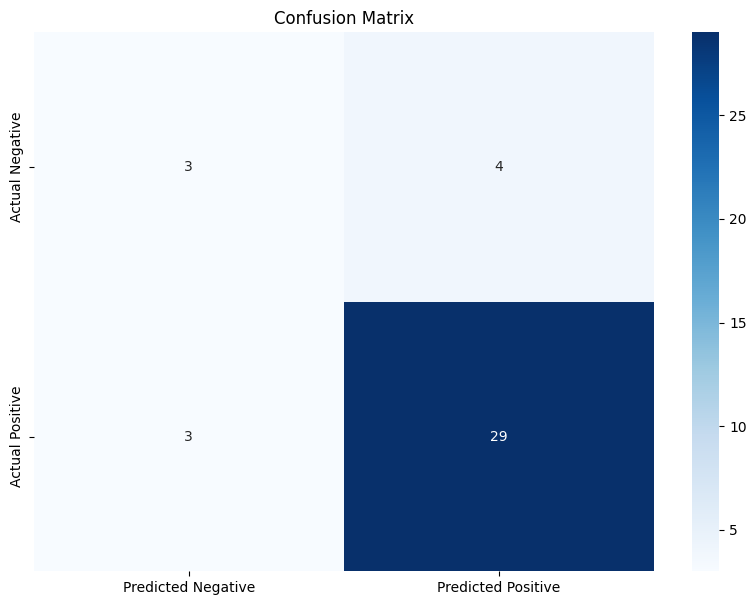

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_KNN)
print(accuracy_score(y_test, y_pred_KNN))
cm_displayer(cm)

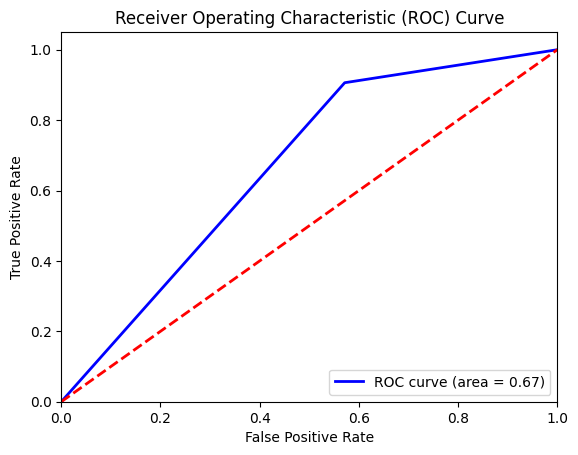

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test.values, y_pred_KNN)  # Calculate AUC score
fpr, tpr, thresholds = roc_curve(y_test.values, y_pred_KNN)  # Compute ROC curve and ROC area

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)
y_pred_NB = nb_classifier.predict(x_test)


In [ ]:
training_data_accuracy = accuracy_score(y_test, y_pred_NB)
print(training_data_accuracy)                                        # Naive Bayes is 71% accurate.

0.717948717948718


In [ ]:
def cm_displayer(cm):
  # Create a DataFrame from the confusion matrix.
  cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

  plt.figure(figsize=(10,7))

  # Create a heatmap from the DataFrame.
  sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')

  plt.title('Confusion Matrix')
  plt.show()

0.717948717948718


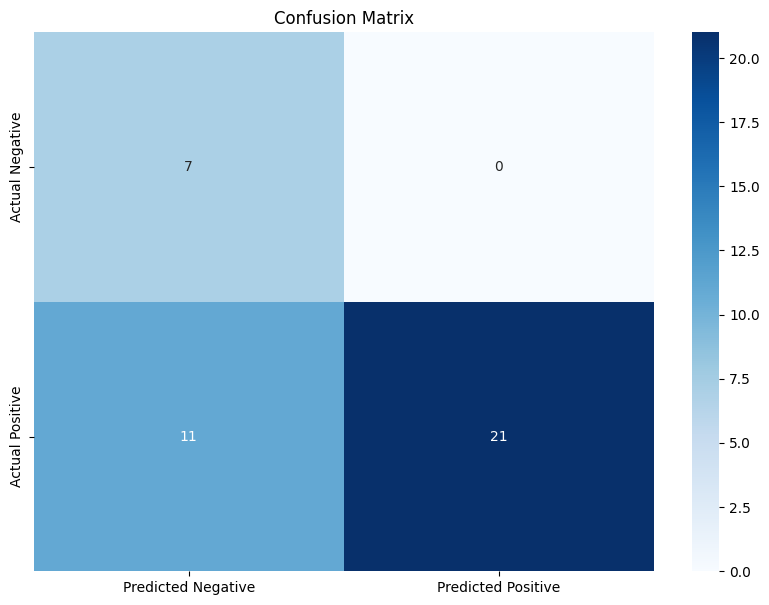

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_NB)
print(accuracy_score(y_test, y_pred_NB))
cm_displayer(cm)

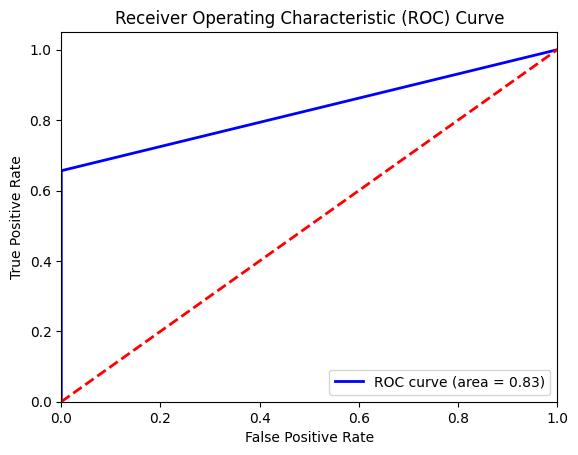

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test.values, y_pred_NB)  # Calculate AUC score
fpr, tpr, thresholds = roc_curve(y_test.values, y_pred_NB)  # Compute ROC curve and ROC area

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Overall the best performance was by SVM model, with 89% accuracy

This is noted due to the high dimensionality of the dataset, which allows svm to perform well but it hinders other models

Hence SVM performs best on the given dataset

In [117]:
X.isna().sum()


MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[2327831.9265798293, 1165869.4690686744, 563867.217201741, 361002.1243000215, 291772.6543308304, 230548.3579873055, 173866.27674026214, 135233.95624304283, 117076.58153234588, 105785.29372938405, 93901.7626423268, 82396.34460815226, 72114.1867864784, 67182.97050555251, 63495.075113277766, 55289.749847798885, 53556.403469623154, 50782.153155535954, 47064.743066422]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


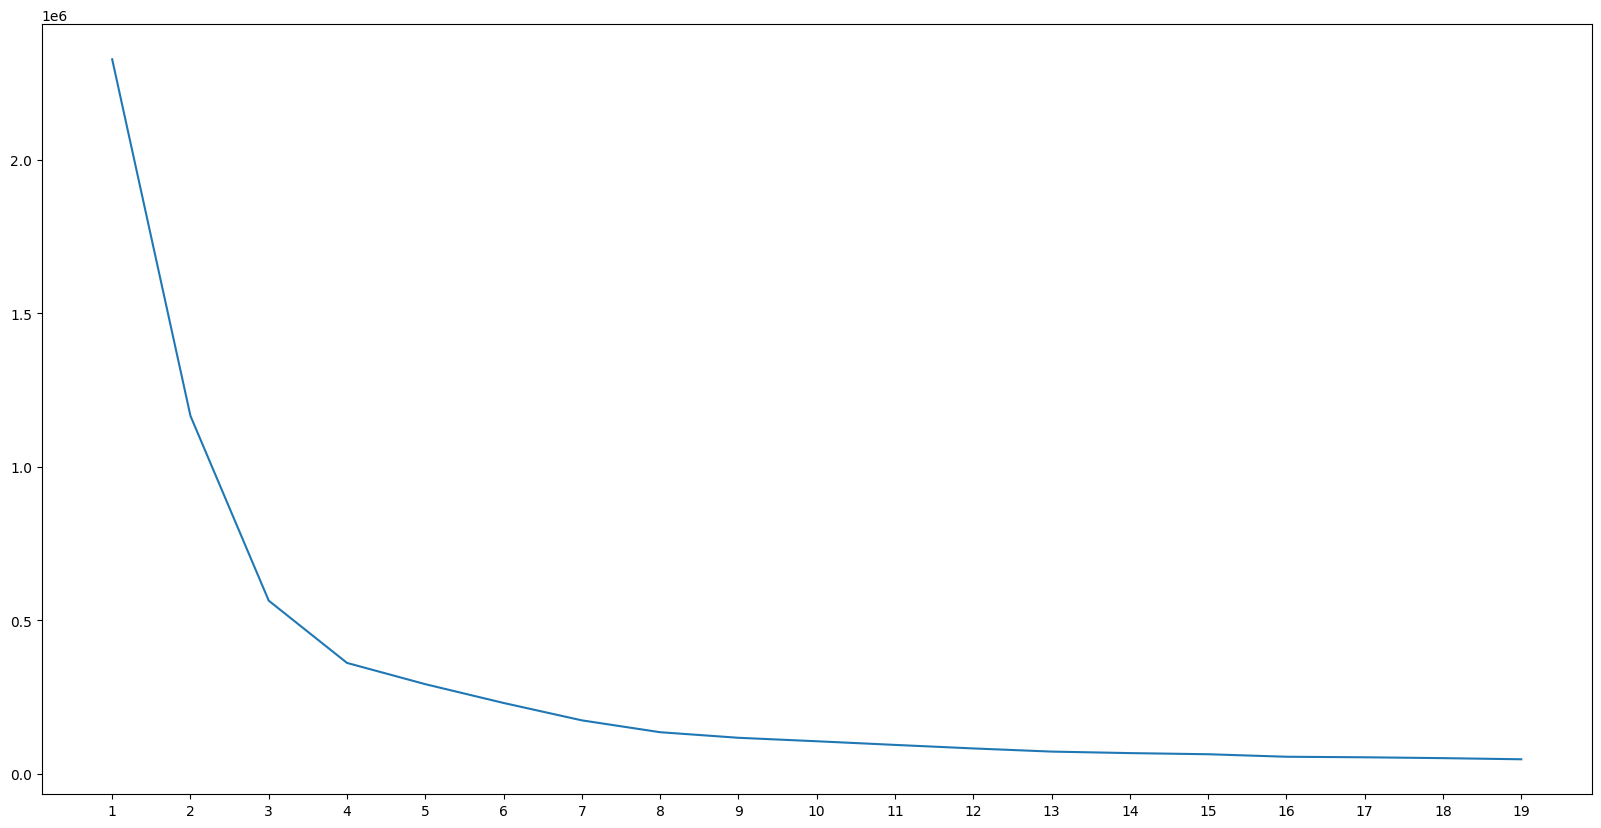

In [126]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
import matplotlib
print(wcss)
plt.figure(figsize=(20,10))
arr = [i for i in range(1,20)]
print(arr)
plt.xticks(range(1,20))
plt.plot(arr,wcss)


In [128]:
!pip install kneed

In [129]:
from kneed import KneeLocator as knq
k1 = knq(range(1,20),wcss,curve="convex",direction="decreasing")
print(k1.elbow)

4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


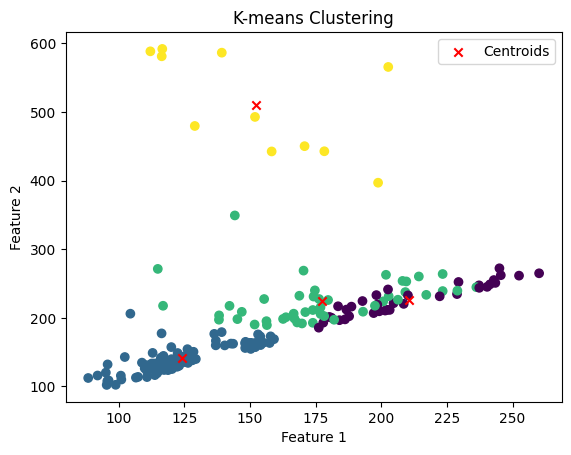

In [130]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)

# Fitting with inputs
kmeans.fit(X)

# Predicting the clusters
labels = kmeans.predict(X)

# Getting the cluster centers
centers = kmeans.cluster_centers_

# Visualizing the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()